In [9]:
import os,random
from datetime import timedelta,datetime
import pandas as pd
import numpy as np

pd.set_option('precision',2)


In [4]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
products = {}

# Get the product dictionary
for i in range(50):
    products['p'+str(i+1)] = round(random.uniform(1,50),2)

# Get the random dates
def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = random.randrange(int_delta)
    return start + timedelta(seconds=random_second)

# Brackets for the date
d1 = datetime.strptime('01-01-2012', '%m-%d-%Y')
d2 = datetime.strptime('01-01-2016', '%m-%d-%Y')

In [11]:
# Genearate product disctionary
def gen_data(n=10):
    product_data = []
    days = ['sunday','monday','tuesday','wednesday','thrusday','friday']    
    for i in range(n):
        day =  random.choice(days)
        prod = random.choice(list(products.keys()))
        qty = random.randint(1,15)
        unit_price = round(products.get(prod),2)
        price = round(unit_price*qty,2)
        date = random_date(d1, d2)
        product_data.append([date.strftime('%m-%d-%Y'),day,prod,qty,unit_price,price])
        
    return product_data 


In [12]:
prod_df = pd.DataFrame(gen_data(n=1000))
prod_df.columns = ['pch_date','day','product','qty','unit_price','total_price']
print prod_df.head(3)

     pch_date       day product  qty  unit_price  total_price
0  11-19-2014    monday     p18    1       17.34        17.34
1  03-10-2015    monday     p16   10        5.94        59.40
2  04-19-2013  thrusday     p50   10       47.43       474.30


#### Data Analysis

In [13]:
prod_df.dtypes

pch_date        object
day             object
product         object
qty              int64
unit_price     float64
total_price    float64
dtype: object

In [14]:
print prod_df.describe()

           qty  unit_price  total_price
count  1000.00     1000.00      1000.00
mean      8.14       26.89       220.13
std       4.42       14.22       179.56
min       1.00        1.80         1.80
25%       4.00       15.27        63.80
50%       8.00       28.06       171.90
75%      12.00       39.77       338.24
max      15.00       48.83       732.45



Check the columns which are object,string and char,  depending on that split the data create:
1. barplot for columns having < 50, chars
2. density or histogram for contineous columns


In [67]:
prod_df['pch_date'] = pd.to_datetime(pd.Series(prod_df['pch_date']),format='%m-%d-%Y',coerce=True)
prod_df['product'] = prod_df['product'].astype('str')
prod_df['day'] =  prod_df['day'].astype('category')
print(prod_df.head(5))

      pch_date      day product  qty  unit_price  total_price  year_month  \
421 2013-01-07  tuesday      p3   13        4.58        59.54           1   
141 2015-09-13   monday      p8    3        3.77        11.31           9   
249 2015-02-02   monday      p5    3        1.80         5.40           2   
826 2015-10-09  tuesday      p5    6        1.80        10.80          10   
427 2014-04-18   friday      p7    6        4.21        25.26           4   

     sales_bin  
421         10  
141         10  
249         10  
826         10  
427         10  


C:\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  if __name__ == '__main__':


              qty                                         
day        friday monday sunday thrusday tuesday wednesday
year_month                                                
1             122    117    135       82     142       112
2              99    113    139      144      92       117
3              72     82     71      147     131       162
4              55     47     86       76     181       131
5             119    106    155      133     105       242
6             103     91    143      109     116       145
7              98     78     86       83     122       122
8              60     86    102      140      86       101
9              58     91    165       99      83        88
10             98     96    139      169      85       136
11            106    179    191       96     121       109
12            140    121     92      127     115        51


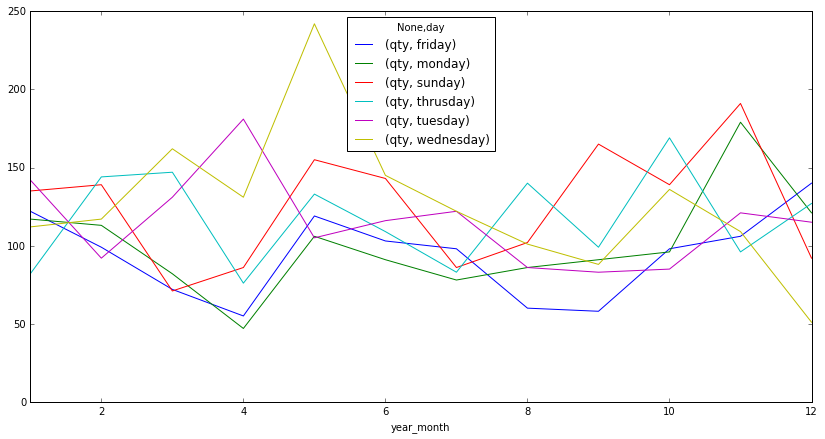

In [16]:
# yearmonth by day count
#prod_df['year_month'] =  prod_df['pch_date'].map(lambda x : 100*x.year + x.month)

prod_df['year_month'] =  prod_df['pch_date'].map(lambda x : x.month)
#print prod_df.head(3)

# Sales on Qty
temp1 = prod_df[['qty','year_month','day']].pivot_table(index='year_month', columns='day', aggfunc= np.sum)
print temp1
temp1.plot(kind='line',figsize=(14,7))

              qty                                         
day        friday monday sunday thrusday tuesday wednesday
year_month                                                
1            7.35   5.30   9.65    12.12    7.76      8.85
2           11.66   8.05  10.10     5.33    4.97      6.03
3           10.28   9.92  10.17    11.07    6.90      8.21
4            2.06   7.24   8.91     9.61   10.47      8.05
5            5.58   9.17   8.61    13.81    6.13      8.93
6            8.23  12.41   3.56    11.47    9.70      7.88
7            9.89   4.93   7.87     4.85    9.78      6.28
8            6.76   6.86  10.91     3.88   13.81      7.40
9            9.30   6.49  10.10     5.57    9.39     12.63
10           7.74   9.23   3.34     6.87    9.46      7.48
11          10.19  11.54   8.91     8.97    8.30      9.98
12          10.97   8.86   7.87     6.46    3.34      8.29


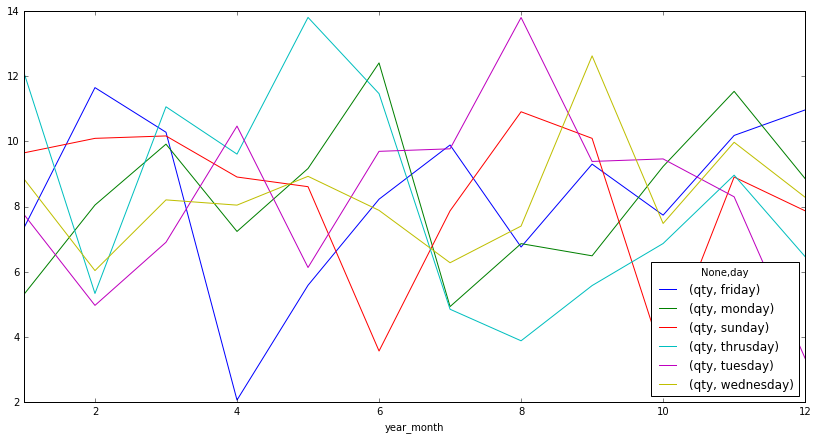

In [64]:
# Calculate percentage along column
%precision 2

temp1 = prod_df[['qty','year_month','day']].pivot_table(index='year_month', columns='day', aggfunc= np.sum)
temp2 = temp1.apply(lambda x:100*x/ float(x.sum()),axis=0)
print temp2
temp2.plot(kind='line',figsize=(14,7))


In [17]:
# qty wise bining and day wise
prod_df['sales_bin'] = pd.qcut(prod_df['unit_price'], 10, labels=[10,9,8,7,6,5,4,3,2,1])
prod_df['sales_bin'] = prod_df['sales_bin'].astype('int64')
#print prod_df.head(5)
prod_df.sort_values(by=['sales_bin'],ascending=False,inplace=True)
print prod_df[['sales_bin','unit_price']].sort_values(by=['sales_bin'],ascending=False).groupby(['sales_bin']).\
        agg({'unit_price':[np.min,np.max,np.size]}).sort_index(ascending=[1])


#print prod_df.dtypes


          unit_price              
                amin   amax   size
sales_bin                         
1              45.39  48.83   97.0
2              42.52  44.29   98.0
3              39.39  40.31  105.0
4              34.36  39.37   82.0
5              28.65  33.52  107.0
6              24.16  28.06   88.0
7              19.46  23.35  104.0
8              13.01  17.34  101.0
9               5.80  12.57  117.0
10              1.80   5.72  101.0


In [93]:
#prod_df.drop(['date_dif'],axis=1,inplace=True)

prod_df.rename(columns={'pch_date_x':'pch_date'},inplace=True)
prod_df.drop(['pch_date_y',''],axis=1,inplace=True)

print prod_df.head(5)

    pch_date        day product  qty  unit_price  total_price  year_month  \
0 2013-01-07    tuesday      p3   13        4.58        59.54           1   
1 2012-05-21     sunday      p3    4        4.58        18.32           5   
2 2013-05-27     monday      p3    6        4.58        27.48           5   
3 2012-07-04  wednesday      p3    9        4.58        41.22           7   
4 2014-07-10   thrusday      p3    9        4.58        41.22           7   

   sales_bin  
0         10  
1         10  
2         10  
3         10  
4         10  


In [ ]:
['__abs__', '__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__div__', '__doc__', 
 '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__inv__', 
 '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__pos__', '__pyx_vtable__',
 '__qualname__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmul__', 
 '__rsub__', '__rtruediv__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 
 '__truediv__', '__weakref__', '_binary_op_method_timedeltalike', '_d', '_ensure_components', '_h', '_has_ns', '_m', 
 '_ms', '_not_implemented', '_ns', '_op_unary_method', '_repr_base', '_round', '_s', '_sign', '_us', '_validate_ops_compat', 
 'asm8', 'ceil', 'components', 'days', 'delta', 'floor', 'freq', 'is_populated', 'max', 'microseconds', 'min', 'nanoseconds', 
 'resolution', 'round', 'seconds', 'to_pytimedelta', 'to_timedelta64', 'total_seconds', 'value', 'view']

In [98]:
'''
#print prod_df.head(5)
# Step 1
def diff_date(x):
    max_date = x.max()
    min_date = x.min()
    diff_month = (max_date.year - min_date.year)*12 + max_date.month +1
    return str(diff_month)  # changing thre return as str

print prod_df[['product','pch_date']].groupby(['product']).agg({'pch_date': diff_date}).reset_index()[:5]
#df1 =  prod_df[['product','pch_date']].groupby(['product']).agg({'pch_date': diff_date}).reset_index()
#print df1.dtypes

'''
print '-'*50


#Step 2
def diff_date(x):
    max_date = x.max()
    min_date = x.min()
    diff_month = (max_date.year - min_date.year)*12 + max_date.month +1
    return diff_month

print prod_df.groupby(['product'])['pch_date'].apply(diff_date).reset_index()[:5]
df2 = prod_df.groupby(['product'])['pch_date'].apply(diff_date).reset_index()
#print df2.dtypes

# change the column name
df2.rename(columns={'pch_date':'date_diff'},inplace=True)
print df2.head(5)

# merging the column
prod_df = pd.merge(prod_df,df2, on=['product'])
print prod_df.head(5)


print '-'*50

# how to name the aggregation and reset the index by drop level 0
df = prod_df[['product','pch_date']].groupby(['product']).agg({'pch_date':{'max_dt':max,'min_dt':min}})
print df.head(5)

df.columns = df.columns.droplevel(0)
print df.reset_index().head(3)





  product pch_date
0      p1       49
1     p10       48
2     p11       45
3     p12       49
4     p13       45
--------------------------------------------------
  product  pch_date
0      p1        49
1     p10        48
2     p11        45
3     p12        49
4     p13        45
  product  date_diff
0      p1         49
1     p10         48
2     p11         45
3     p12         49
4     p13         45
    pch_date        day product  qty  unit_price  total_price  year_month  \
0 2013-01-07    tuesday      p3   13        4.58        59.54           1   
1 2012-05-21     sunday      p3    4        4.58        18.32           5   
2 2013-05-27     monday      p3    6        4.58        27.48           5   
3 2012-07-04  wednesday      p3    9        4.58        41.22           7   
4 2014-07-10   thrusday      p3    9        4.58        41.22           7   

   sales_bin  date_diff_x  date_diff_y  date_diff  
0         10           45           45         45  
1         10          

In [96]:
print prod_df.head(4)

    pch_date        day product  qty  unit_price  total_price  year_month  \
0 2013-01-07    tuesday      p3   13        4.58        59.54           1   
1 2012-05-21     sunday      p3    4        4.58        18.32           5   
2 2013-05-27     monday      p3    6        4.58        27.48           5   
3 2012-07-04  wednesday      p3    9        4.58        41.22           7   

   sales_bin  date_diff  
0         10         45  
1         10         45  
2         10         45  
3         10         45  


In [100]:
#when it started and when 
df.reset_index(inplace=True)
print df.head(3)








  product     min_dt     max_dt
0      p1 2012-05-31 2015-12-31
1     p10 2012-05-10 2015-11-04
2     p11 2012-05-05 2015-08-18


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

prd_num = prod_df.select_dtypes(include=numerics)
prd_cat = prod_df.select_dtypes(exclude=numerics)

print(prd_num.head(5))
print(prd_cat.head(5))

   qty  unit_price  total_price
0    8       35.82       286.56
1    5       44.32       221.60
2   15       43.64       654.60
3    4       49.74       198.96
4    4        5.17        20.68
    pch_date product
0 2013-05-02     p34
1 2015-02-04     p11
2 2013-05-01     p13
3 2012-03-31      p9
4 2015-08-02      p2


In [270]:
print('Date count:{} and Product count:{}'.format(np.size(list(prod_df['pch_date'].unique())) \
                                                  ,np.size(list(prod_df['product'].unique()))))


Date count:734 and Product count:50


In [272]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [273]:
prod_df.shape[0]

1000

In [184]:
# Get the percentage productwise and then list them to print in form of dictionary for the column

tot_qty = prod_df.shape[0]
pd_count= prod_df.groupby('product')['product'].count().apply(lambda x: 100*x/float(tot_qty))
pd_count.columns = ['cnt']
#print(pd_count.head())
#print(pd_count.index)

#print(pd_count['p10'])

pd_list = [(ind,pd_count[ind]) for ind in pd_count.index]

#pd_list = [(prod,cnt) for prod,cnt in pd_count]

print(pd_list)
#print(pd_count.groupby(['product']).apply(lambda x: 100*x/float(tot_qty)))



[('p1', 2.0), ('p10', 3.0), ('p11', 3.0), ('p12', 1.0), ('p13', 2.0), ('p14', 1.0), ('p15', 2.0), ('p16', 1.0), ('p17', 2.0), ('p18', 2.0), ('p19', 2.0), ('p2', 3.0), ('p20', 3.0), ('p21', 2.0), ('p22', 3.0), ('p23', 3.0), ('p24', 3.0), ('p26', 1.0), ('p28', 2.0), ('p3', 3.0), ('p30', 3.0), ('p31', 4.0), ('p32', 3.0), ('p33', 1.0), ('p34', 3.0), ('p35', 2.0), ('p36', 1.0), ('p38', 4.0), ('p4', 2.0), ('p41', 2.0), ('p42', 2.0), ('p45', 2.0), ('p46', 4.0), ('p47', 2.0), ('p48', 1.0), ('p49', 2.0), ('p5', 5.0), ('p50', 1.0), ('p6', 1.0), ('p7', 1.0), ('p8', 1.0), ('p9', 4.0)]


In [278]:
# Working on the def where will send one columns and get the count for each categorical element

def get_cat_counts(df,col):
    tot_qty = df.shape[0]
    pd_count= df.groupby(col)[col].count().apply(lambda x: round(100*x/float(tot_qty),2))
    
    prd = [(ind,round(pd_count[ind],2)) for ind in pd_count.index]
    return prd

col = 'product'
get_list = get_cat_counts(prod_df,col)
print(get_list)

[('p1', 2.2), ('p10', 1.2), ('p11', 2.4), ('p12', 2.1), ('p13', 2.0), ('p14', 2.5), ('p15', 1.1), ('p16', 2.6), ('p17', 1.4), ('p18', 2.2), ('p19', 2.7), ('p2', 1.9), ('p20', 2.0), ('p21', 2.6), ('p22', 1.9), ('p23', 1.9), ('p24', 1.9), ('p25', 2.5), ('p26', 2.4), ('p27', 1.6), ('p28', 2.3), ('p29', 1.9), ('p3', 1.1), ('p30', 1.7), ('p31', 1.5), ('p32', 1.7), ('p33', 2.4), ('p34', 2.2), ('p35', 2.5), ('p36', 2.1), ('p37', 1.8), ('p38', 2.0), ('p39', 2.8), ('p4', 1.6), ('p40', 2.1), ('p41', 1.9), ('p42', 2.0), ('p43', 1.9), ('p44', 2.1), ('p45', 2.1), ('p46', 2.1), ('p47', 1.7), ('p48', 1.9), ('p49', 1.8), ('p5', 2.7), ('p50', 1.8), ('p6', 2.2), ('p7', 1.5), ('p8', 1.5), ('p9', 2.0)]


In [279]:
df = prod_df.copy()
prod_df.loc[(prod_df['product'].isin(['p37','p39'])),['product']] = np.nan

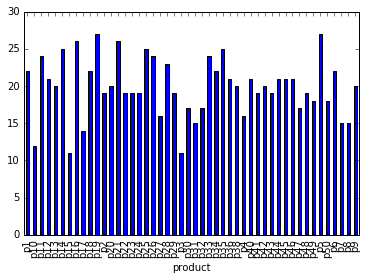

In [280]:
prd_grp = prod_df.groupby(['product']).count()
prd_grp['qty'].plot(kind='bar')

In [39]:
print(prod_df.head(10))
print(prod_df.columns)

    pch_date product  qty  unit_price  total_price
0 2013-05-02     p34    8       35.82       286.56
1 2015-02-04     p11    5       44.32       221.60
2 2013-05-01     p13   15       43.64       654.60
3 2012-03-31      p9    4       49.74       198.96
4 2015-08-02      p2    4        5.17        20.68
5 2013-04-01     p42   12       43.91       526.92
6 2015-03-28     p15    7        7.55        52.85
7 2015-07-01      p3    1       45.17        45.17
8 2013-06-22     p46    7       41.54       290.78
9 2012-06-06     p31   13       14.37       186.81
Index([u'pch_date', u'product', u'qty', u'unit_price', u'total_price'], dtype='object')


In [282]:
# get the sum of numm columns in the data set
#
print(prod_df.isnull().sum())

null_counts = prod_df.isnull().sum()
rows = prod_df.shape[0]
null_cnt_list = [(ind,round(100.0*null_counts[ind]/rows,2))  for ind in null_counts.index]
print(null_cnt_list)


pch_date        0
product        46
qty             0
unit_price      0
total_price     0
dtype: int64
[('pch_date', 0.0), ('product', 4.6), ('qty', 0.0), ('unit_price', 0.0), ('total_price', 0.0)]


In [283]:
# this only gives the count of items per column
print(prod_df.count())

pch_date       1000
product         954
qty            1000
unit_price     1000
total_price    1000
dtype: int64


In [284]:
# define a function that takes a categorical/string based dataset and give the data distribution:
# if count less than 10 then  prints category: count 
# else print at the lat the column names more than 20 category
# checks the number of NaN 
# gives count and percentages:


def categorical_fields_analyzer(df):
    
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        df_cat = df.select_dtypes(exclude=numerics)
        
        cols = list(df_cat.columns)
        
        cols_to_check = {}
        cols_to_analyze = {}
        
        for col in cols:
            n = len(list(df_cat[col].unique()))
            print('{}  has {} unique values'.format(col,n))
            
            if n > 10:
                cols_to_check[col]=[str(val) for val in df_cat[col][:6]]
            else:
                cols_to_analyze[col] = get_cat_counts(df_cat,col)
        
        print("\nColumns to check:\n")
        
        for key,values in cols_to_check.items():
            print(key)
            print(', '.join(values)+"\n")
            
            
            
        print("\n")    
            
            
        print("Distribustion of data:\n")
        for item in cols_to_analyze.items():
            print(item)
        
categorical_fields_analyzer(prod_df)  

pch_date  has 734 unique values
product  has 49 unique values

Columns to check:

pch_date
2014-05-29 00:00:00, 2014-03-30 00:00:00, 2012-03-01 00:00:00, 2014-03-26 00:00:00, 2014-04-17 00:00:00, 2015-04-14 00:00:00

product
p34, p2, p49, p14, p35, p2



Distribustion of data:



In [232]:
# printing list horizontally
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

print(','.join(days))

Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday


In [254]:
sm = [str(e) for e in prod_df['product'][:6]]
print(','.join(sm))

p34,p11,p13,p9,p2,p42


In [313]:
def column_analyzer(df):
    results = {}
    
    for col in list(df.columns):
        
        data = list(df[col])
    
        summary= {"total #":len(data),"NULL #": data.count(np.nan),
                  #"unique #":len(set(data)),
              "% present":(100.0*(len(data)- data.count(np.nan))/len(data)),
              "% absent":(100.0*data.count(np.nan)/len(data))}
        results[col] = summary
    
    for item in results.items():
        print(item)
    
 
print(column_analyzer(prod_df))    
    
    

('pch_date', {'% absent': 0.0, 'total #': 1000, 'NULL #': 0, '% present': 100.0})
('product', {'% absent': 4.6, 'total #': 1000, 'NULL #': 46, '% present': 95.4})
('total_price', {'% absent': 0.0, 'total #': 1000, 'NULL #': 0, '% present': 100.0})
('unit_price', {'% absent': 0.0, 'total #': 1000, 'NULL #': 0, '% present': 100.0})
('qty', {'% absent': 0.0, 'total #': 1000, 'NULL #': 0, '% present': 100.0})
None
